In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.1.0+cu121
0.16.0+cu121


## 1. Getting datset

Dataset - CIFAR-10

In [2]:
from torchvision import transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(32,32)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [3]:
# Setup training data

from torchvision import datasets
train_data = datasets.CIFAR10(
    root='data',  # where to download
    train=True,   # do we want the training dataset
    download=True, # do we want to download yes/no
    transform= data_transform,  # how do we want to transform the data
    target_transform=None  # how do we want tot transform the labels/targets
)

test_data = datasets.CIFAR10(
    root='data',
    train=False,
    download=True,
    transform=data_transform,
    target_transform=None
)

100%|██████████| 170498071/170498071 [00:13<00:00, 12976710.22it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


In [4]:
len(train_data), len(test_data)

(50000, 10000)

In [5]:
# Seeing first example
image, label = train_data[0]
image, label

(tensor([[[0.5804, 0.5961, 0.6196,  ..., 0.1961, 0.1686, 0.2314],
          [0.4784, 0.4667, 0.4824,  ..., 0.0706, 0.0000, 0.0627],
          [0.4275, 0.4706, 0.4627,  ..., 0.1922, 0.0627, 0.0980],
          ...,
          [0.2078, 0.2196, 0.6275,  ..., 0.7765, 0.7882, 0.8157],
          [0.3255, 0.3804, 0.7216,  ..., 0.7294, 0.6784, 0.7059],
          [0.4824, 0.5922, 0.8471,  ..., 0.7020, 0.6588, 0.6941]],
 
         [[0.4863, 0.4902, 0.5176,  ..., 0.1882, 0.1804, 0.2431],
          [0.3412, 0.3255, 0.3451,  ..., 0.0314, 0.0000, 0.0784],
          [0.2863, 0.3294, 0.3294,  ..., 0.1059, 0.0275, 0.0941],
          ...,
          [0.1333, 0.1216, 0.5216,  ..., 0.6314, 0.6000, 0.6667],
          [0.2078, 0.2431, 0.5804,  ..., 0.5647, 0.4824, 0.5451],
          [0.3608, 0.4627, 0.7216,  ..., 0.5569, 0.5059, 0.5647]],
 
         [[0.4039, 0.4000, 0.4235,  ..., 0.1686, 0.1765, 0.2471],
          [0.2235, 0.1961, 0.2157,  ..., 0.0000, 0.0000, 0.0784],
          [0.1647, 0.1961, 0.1961,  ...,

In [6]:
# Different classes/labels

class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
# Classes with there index number

class_to_idx = train_data.class_to_idx
class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

### 1.1 Getting input and output shapes of data

In [8]:
image.shape, class_names[label]

(torch.Size([3, 32, 32]), 'frog')

### 1.2 Visualizing the data

Image shape: torch.Size([3, 32, 32])


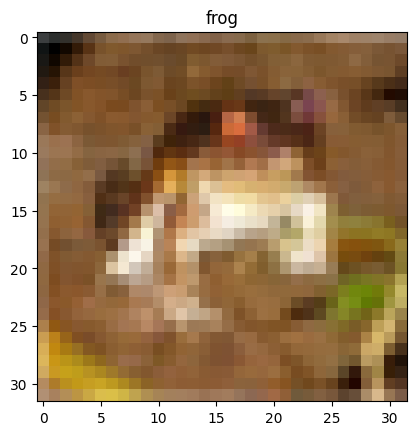

In [9]:
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.permute(1,2,0))
plt.title(class_names[label]);

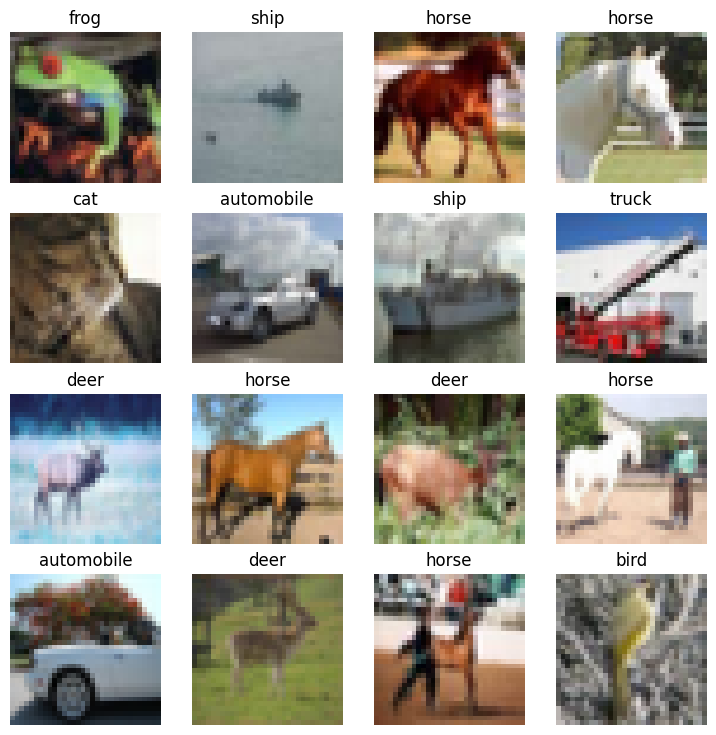

In [10]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.permute(1,2,0), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

## 2. Prepare DataLoader

In [11]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x787fee36a950>,
 <torch.utils.data.dataloader.DataLoader at 0x787fee36a2f0>)

In [12]:
# Checking number of batches created
print(f'Length of train_dataloader {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'Length of test_dataloader {len(test_dataloader)} batches of {BATCH_SIZE}')

Length of train_dataloader 1563 batches of 32
Length of test_dataloader 313 batches of 32


In [13]:
# Checking whats inside train_dataloader
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

Image size:torch.Size([3, 32, 32])
Label:6, Label shape:torch.Size([])


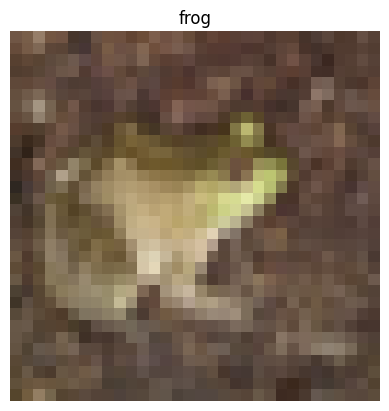

In [14]:
# Seeing a sample from train_dataloader
random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.permute(1,2,0))
plt.title(class_names[label])
plt.axis(False)
print(f'Image size:{img.shape}')
print(f'Label:{label}, Label shape:{label.shape}')

## 3. Model_0 : Building a basline model

In [15]:
from torch import nn

class CIFARModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [16]:
torch.manual_seed(42)

# Setting up model with input parameters
model_0 = CIFARModelV0(
    input_shape = (3*32*32), # input of linear layer
    hidden_units = 10,
    output_shape= len(class_names)
).to('cpu')

model_0

CIFARModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
dummy_x = torch.rand([1,3,32,32])
model_0(dummy_x)

tensor([[ 0.2860,  0.0425,  0.1333, -0.3589, -0.0223,  0.0192,  0.1143, -0.0072,
         -0.1990, -0.1155]], grad_fn=<AddmmBackward0>)

### 3.1 Setup loss function, optimizer and evaluation metrics

In [18]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [19]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = correct/len(y_pred) * 100
  return acc

### 3.2 Creating an function to time our experiments

In [20]:
from timeit import default_timer as timer

def print_train_timer(start : float,
                      end : float,
                      device: torch.device=None):
  total_time = end - start
  print(f'Train time on {device}:{total_time:.3f} seconds')
  return total_time

In [21]:
# Import tqdm for progress bar

from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we keep it small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epoch:{epoch}\n----')

  ### Training
  train_loss = 0

  # Add a loop to loop through the training batches
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred = model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step - Models parameters are updated per batch in place of per epochs
    optimizer.step()

    # Print out what's happening
    if batch%400 == 0:
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.')

  # Divide total train loss by lenght of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. Calculate acc
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # Calculate the test loss average per batch
    test_loss /=len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # Print out what's happening
  print(f'\nTrain loss:{train_loss:.4f}| Test loss:{test_loss:.4f}|Test acc:{test_acc:.2f}%')


# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_timer(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
----
Looked at 0/50000 samples.
Looked at 12800/50000 samples.
Looked at 25600/50000 samples.
Looked at 38400/50000 samples.

Train loss:1.9459| Test loss:1.8695|Test acc:33.69%
Epoch:1
----
Looked at 0/50000 samples.
Looked at 12800/50000 samples.
Looked at 25600/50000 samples.
Looked at 38400/50000 samples.

Train loss:1.8293| Test loss:1.8135|Test acc:36.62%
Epoch:2
----
Looked at 0/50000 samples.
Looked at 12800/50000 samples.
Looked at 25600/50000 samples.
Looked at 38400/50000 samples.

Train loss:1.7973| Test loss:1.8088|Test acc:36.92%
Train time on cpu:47.420 seconds


## 4. Make predicitions and get get model 0 results

In [22]:
torch.manual_seed(42)

def eval_mode(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device=None):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss+= loss_fn(y_pred,y)
      acc+=accuracy_fn(y_true=y,
                      y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {'mode_name:' : model.__class__.__name__,
          'model_loss' : loss.item(),
          'model_acc' : acc}

In [23]:
model_0_results = eval_mode(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn = loss_fn,
                            accuracy_fn = accuracy_fn,
                            device= 'cpu')
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'mode_name:': 'CIFARModelV0',
 'model_loss': 1.808881163597107,
 'model_acc': 36.96086261980831}

## 5. Setup device agnostic-code

In [24]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [25]:
from torchvision import transforms

data_transform_1 = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [26]:
# Setup training data

from torchvision import datasets
train_data_1 = datasets.CIFAR10(
    root='data',  # where to download
    train=True,   # do we want the training dataset
    download=True, # do we want to download yes/no
    transform= data_transform_1,  # how do we want to transform the data
    target_transform=None  # how do we want tot transform the labels/targets
)

test_data_1 = datasets.CIFAR10(
    root='data',
    train=False,
    download=True,
    transform=data_transform_1,
    target_transform=None
)

Files already downloaded and verified
Files already downloaded and verified


In [27]:
from torch.utils.data import DataLoader
import os

BATCH_SIZE = 32

train_dataloader_1 = DataLoader(dataset=train_data_1,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader_1 = DataLoader(dataset=test_data_1,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader_1, test_dataloader_1

(<torch.utils.data.dataloader.DataLoader at 0x787fee2ce4d0>,
 <torch.utils.data.dataloader.DataLoader at 0x787fee2cc520>)

## 6.1 Model 1: TinyVGG without augumentation

In [28]:
class TinyVGG(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int)->None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    print(x.shape)
    x = self.conv_block_2(x)
    print(x.shape)
    x = self.classifier(x)
    print(x.shape)
    return x

In [29]:
torch.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=10, bias=True)
  )
)

In [30]:
# Try a forward pass on a single Image (to test the model)

image_batch, label_batch = next(iter(train_dataloader_1))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [31]:
model_1(image_batch.to(device))

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
torch.Size([32, 10])


tensor([[ 0.0483,  0.0540,  0.0251, -0.0467, -0.0442,  0.0324, -0.0697,  0.0887,
         -0.0284,  0.0591],
        [ 0.0553,  0.0569,  0.0273, -0.0472, -0.0449,  0.0324, -0.0722,  0.0882,
         -0.0266,  0.0647],
        [ 0.0499,  0.0518,  0.0232, -0.0421, -0.0440,  0.0301, -0.0668,  0.0837,
         -0.0251,  0.0580],
        [ 0.0551,  0.0570,  0.0270, -0.0467, -0.0462,  0.0299, -0.0732,  0.0911,
         -0.0238,  0.0688],
        [ 0.0541,  0.0554,  0.0242, -0.0437, -0.0441,  0.0309, -0.0725,  0.0858,
         -0.0258,  0.0632],
        [ 0.0506,  0.0520,  0.0255, -0.0449, -0.0431,  0.0324, -0.0692,  0.0862,
         -0.0272,  0.0594],
        [ 0.0482,  0.0499,  0.0241, -0.0427, -0.0428,  0.0313, -0.0698,  0.0824,
         -0.0255,  0.0563],
        [ 0.0462,  0.0517,  0.0253, -0.0441, -0.0429,  0.0277, -0.0720,  0.0850,
         -0.0242,  0.0597],
        [ 0.0485,  0.0516,  0.0243, -0.0421, -0.0443,  0.0288, -0.0717,  0.0819,
         -0.0258,  0.0595],
        [ 0.0528,  